In [ ]:
%pip install pandas_ta

In [1]:
import requests
import pandas as pd
# import pandas_ta as ta
import requests
import io
import matplotlib.pyplot as plt
import plotly.express as px
keys = ['YR7C1B1NPZ97A348', 'JCQFVNBK3U8QMZ0T', 'P1Y9WYCX6JNW4N1M' ]
stocks = ('NTDOY', 'TTWO')
MY_KEY = "YR7C1B1NPZ97A348"


In [4]:
def fetch_stock_data(symbol, api_key, year_needed):

    DAILY_ENDPOINT = f"https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={symbol}&outputsize=full&apikey={api_key}&datatype=csv"
    r = requests.get(DAILY_ENDPOINT).content
    df = pd.read_csv(io.StringIO(r.decode('utf-8')))
    df = pd.DataFrame(df)
    df["timestamp"] = pd.to_datetime(df["timestamp"])
    df = df[df["timestamp"].dt.year>=year_needed]
    if symbol == "NTDOY":
# Identify the date of the share split
      share_split_date = pd.to_datetime('10/04/2022')

# Filter data before and after the share split date
      before_split = df[df['timestamp'] < share_split_date]
      after_split = df[df['timestamp'] >= share_split_date]

      # Divide the prices before the share split date by 5
      before_split[['open', 'high', 'low', 'close']] = before_split[['open', 'high', 'low', 'close']] / 5

      # Concatenate the adjusted data
      adjusted_df = pd.concat([after_split, before_split])
      return adjusted_df
    else:
      return df


ntdoy_df = fetch_stock_data("NTDOY", MY_KEY, 2000)
ntdoy_df

<ipython-input-4-1590f92f6d95>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  before_split[['open', 'high', 'low', 'close']] = before_split[['open', 'high', 'low', 'close']] / 5


,timestamp,open,high,low,close,volume
0,2023-12-08,11.73,11.80,11.73,11.79,713969
1,2023-12-07,11.69,11.80,11.69,11.73,856172
2,2023-12-06,11.62,11.71,11.57,11.57,1082172
3,2023-12-05,11.50,11.60,11.50,11.55,469018
4,2023-12-04,11.58,11.65,11.49,11.55,562441
...,...,...,...,...,...,...
5717,2001-01-08,3.90,3.90,3.90,3.90,0
5718,2001-01-05,3.90,3.90,3.90,3.90,0
5719,2001-01-04,3.90,3.90,3.90,3.90,0
5720,2001-01-03,3.90,3.90,3.90,3.90,0


In [5]:
ttwwo_df = fetch_stock_data("TTWO", MY_KEY, 2000)


In [6]:
ttwwo_df.head(20)

,timestamp,open,high,low,close,volume
0,2023-12-08,154.380,156.7225,154.0800,155.32,2078011
1,2023-12-07,155.100,155.8500,153.5550,154.21,2437241
2,2023-12-06,157.500,158.8100,156.5450,157.32,2544042
3,2023-12-05,154.260,157.9800,152.1200,156.76,3596960
4,2023-12-04,157.350,158.4500,154.5000,157.56,1878865
5,2023-12-01,158.690,161.6050,157.2000,157.84,1733670
6,2023-11-30,157.170,158.5400,156.5000,158.20,1508258
7,2023-11-29,157.590,158.8400,155.7400,157.01,1562460
8,2023-11-28,156.270,158.1700,156.2700,156.68,1324690
9,2023-11-27,156.050,157.5800,156.0100,156.27,1008479


In [ ]:
fetch_stock_data("TTWO", MY_KEY, 2000)

,timestamp,open,high,low,close,volume
0,2023-12-08,154.380,156.7225,154.080,155.32,2078011
1,2023-12-07,155.100,155.8500,153.555,154.21,2437241
2,2023-12-06,157.500,158.8100,156.545,157.32,2544042
3,2023-12-05,154.260,157.9800,152.120,156.76,3596960
4,2023-12-04,157.350,158.4500,154.500,157.56,1878865
...,...,...,...,...,...,...
6018,2000-01-07,13.000,13.5600,12.560,13.50,321867
6019,2000-01-06,13.190,13.5000,12.750,13.13,249400
6020,2000-01-05,13.125,13.3125,12.500,13.25,419200
6021,2000-01-04,13.630,14.0000,13.000,13.31,230200


In [ ]:
#PART TWO: DATA ANALYSIS & TIME SERIES ESTIMATION

In [ ]:
from sklearn import linear_model
import datetime

#Pass in date sorted data set with target and test values and amount of days to look back
def Lin_Reg_k_days(data, k):
  #Get regression model
  k_data = []
  if( k <= len(data)):
    #Show only k days back to model on
    k_data = data[:k]
    reg = linear_model.LinearRegression()
    #times reflect how many days prior far back the model is from
    times = [[day] for day in range(k)]
    target = []
    for index, entry in data[:k].iterrows():
      #times.append([entry['timestamp']])
      target.append([entry['close']])
    reg.fit(times, target)
    return reg
  else:
    print(f"Callback exceeds data length. Farthest callback is {len(data)} days")
    return 0


number of days: 1000


<ipython-input-46-b786392458c5>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  before_split[['open', 'high', 'low', 'close']] = before_split[['open', 'high', 'low', 'close']] / 5


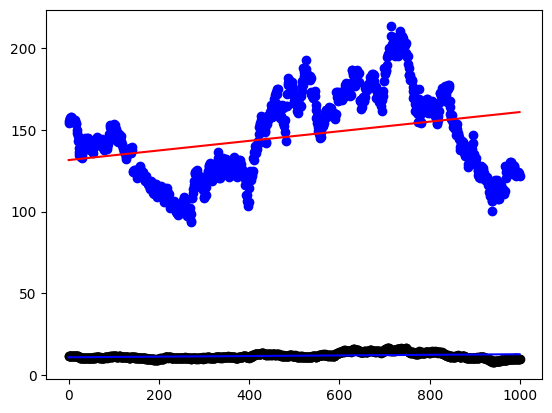

In [ ]:
#How far back do we want to go?
days = int(input("number of days: "))

#Pull in company data
ntdoy_data = fetch_stock_data("NTDOY", MY_KEY, 2000)
ttwo_data = fetch_stock_data("TTWO", MY_KEY, 2000)

#get regression models for both companies
lin_model_ntdoy = Lin_Reg_k_days(ntdoy_data, days)
lin_model_ttwo = Lin_Reg_k_days(ttwo_data, days)

#get prediction used for graphing
time_interval = [[k] for k in range(days)]
#Get graph predictions based on regression
ntdoy_pred = lin_model_ntdoy.predict(time_interval)
ttwo_pred = lin_model_ttwo.predict(time_interval)
#Graph the points
#NEED TO REVERSE GRAPH
plt.scatter(time_interval, ntdoy_data[:days]['close'], color = 'black')
plt.scatter(time_interval, ttwo_data[:days]['close'], color = 'blue')
plt.plot(time_interval, ntdoy_pred, color="blue")
plt.plot(time_interval, ttwo_pred, color="red")
plt.show()

In [ ]:
#%pip install tensorflow

In [ ]:
copy = fetch_stock_data("NTDOY", MY_KEY, 2000)
times = []
for index, row in copy.iterrows():
  times.append(row['timestamp'].strftime('%Y-%m-%d'))

<ipython-input-46-b786392458c5>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  before_split[['open', 'high', 'low', 'close']] = before_split[['open', 'high', 'low', 'close']] / 5


In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split, TimeSeriesSplit
import datetime as dt

copy['timestamp'] = times
copy.set_index('timestamp', inplace = True)
#TIMESTAMP AS TimeStamp type is messing up the LSTM
target_y = copy['close']
X_feat = copy.iloc[:,0:3]
#Feature Scaling
sc = StandardScaler()
X_ft = sc.fit_transform(X_feat.values)
X_ft = pd.DataFrame(columns = X_feat.columns,
                    data = X_ft,
                    index = X_feat.index)

In [ ]:
def lstm_split(data, n_steps):
  X,y = [], []
  for i in range(len(data) - n_steps +1):
    X.append(data[i:i + n_steps, :-1])
    y.append(data[i + n_steps-1, -1])
  return np.array(X), np.array(y)

In [ ]:
X1, y1 = lstm_split(copy.values, n_steps = 2)

train_split = 0.8
split_idx = int(np.ceil(len(X1)* train_split))
date_index = copy.index

X_train, X_test = X1[:split_idx], X1[split_idx:]
y_train, y_test = y1[:split_idx], y1[split_idx:]
X_train_date, X_test_date = date_index[:split_idx], date_index[split_idx:]
print(X1.shape, X_train.shape, X_test.shape, y_test.shape)

(5721, 2, 4) (4577, 2, 4) (1144, 2, 4) (1144,)


In [ ]:
lstm = Sequential()
lstm.add(LSTM(50, input_shape = (X_train.shape[1],X_train.shape[2]),
                                activation ='relu', return_sequences = True))
lstm.add(LSTM(50, activation='relu'))

lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer= 'adam')
lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 2, 50)             11000     
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 31251 (122.07 KB)
Trainable params: 31251 (122.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = lstm.fit(X_train, y_train, epochs = 100, batch_size = 4, verbose = 2, shuffle = False)
print(history)

Epoch 1/100
1145/1145 - 17s - loss: 466492850176.0000 - 17s/epoch - 14ms/step
Epoch 2/100
1145/1145 - 6s - loss: 381563273216.0000 - 6s/epoch - 6ms/step
Epoch 3/100
1145/1145 - 5s - loss: 376803262464.0000 - 5s/epoch - 5ms/step
Epoch 4/100
1145/1145 - 6s - loss: 376953700352.0000 - 6s/epoch - 5ms/step
Epoch 5/100
1145/1145 - 6s - loss: 376439275520.0000 - 6s/epoch - 5ms/step
Epoch 6/100
1145/1145 - 5s - loss: 376327340032.0000 - 5s/epoch - 4ms/step
Epoch 7/100
1145/1145 - 6s - loss: 376283004928.0000 - 6s/epoch - 6ms/step
Epoch 8/100
1145/1145 - 5s - loss: 376260296704.0000 - 5s/epoch - 4ms/step
Epoch 9/100
1145/1145 - 6s - loss: 376240275456.0000 - 6s/epoch - 5ms/step
Epoch 10/100
1145/1145 - 6s - loss: 376221040640.0000 - 6s/epoch - 5ms/step
Epoch 11/100
1145/1145 - 5s - loss: 376202493952.0000 - 5s/epoch - 4ms/step
Epoch 12/100
1145/1145 - 6s - loss: 376183980032.0000 - 6s/epoch - 6ms/step
Epoch 13/100
1145/1145 - 6s - loss: 376164909056.0000 - 6s/epoch - 5ms/step
Epoch 14/100
1145/

In [ ]:
#Outputs 2 values instead of 1?
y_pred = lstm.predict(X_test)
plt.plot(X_test_date[:-1], y_test)
plt.plot(X_test_date[:-1], y_pred)
plt.show()

In [ ]:
rsme = mean_squared_error(y_test, y_pred, squared= False)
mape = mean_absolute_percentage_error(y_test, y_pred)
print("RSME: ", rsme)
print("MAPE: ", mape)

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, SplineTransformer

def poly_regression(data, days, degree):
  model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha = 1e-1000))
  X = [[data['open'][k], data['high'][k], data['low'][k], data['volume'][k]] for k in range(days)]
  model.fit(X, data['close'][:days])
  y_plot = model.predict(X)

  fig, ax = plt.subplots()
  ax.plot(data['timestamp'][:days], y_plot, label =f'{len(data)}')
  ax.plot(data['timestamp'][:days], data['close'][:days], label =f'{len(data)}')
  plt.show()
  rsme = mean_squared_error(data['close'][:days], y_plot, squared= False)
  mape = mean_absolute_percentage_error(data['close'][:days],y_plot)
  print("RSME: ", rsme)
  print("MAPE: ", mape)


#Pull in company data
#ntdoy_data = fetch_stock_data("NTDOY", MY_KEY, 2000)
#ttwo_data = fetch_stock_data("TTWO", MY_KEY, 2000)

#ttwo_data.set_index('timestamp', inplace = True)
#ntdoy_data.set_index('timestamp', inplace = True)
days = int(input("Number of days: "))
#SOMEWHERE IN HERE IS A VALUE THAT'S TOO LARGE (if days>150 bad stuff happens)
poly_regression(ntdoy_data, days, 4)
poly_regression(ttwo_data, days,  4)

In [ ]:
plt.plot(ntdoy_data['timestamp'], ntdoy_data['close'])
plt.plot(ttwo_data['timestamp'], ttwo_data['close'])
plt.show()

In [ ]:
ttwo_data

In [ ]:
ntdoy_data

In [ ]:
#SLIDING WINDOW NEURAL NET REGRESSION
from sklearn.neural_network import MLPRegressor
import datetime as dt
from datetime import timedelta
#Size of input window Predict one day into future
WINDOW = 13
#How far back we look
DAYS = 14

#Build training/test set over DAYS
today = dt.date.today()
ntdoy_data['days_prior'] = [(today - ntdoy_data['timestamp'][i].date()).days for i in range(len(ntdoy_data))]
data = ntdoy_data[:DAYS]

data['timestamp']=data['timestamp'].astype(str)
X = np.array([data['close'][i:i+WINDOW] for i in range(1,DAYS-WINDOW+1)], dtype='object')
#print(data['timestamp'])
X_plot = np.array([data['timestamp'][len(X)-i] for i in range(len(X))], dtype='object')
#print(X_plot)
y = np.array([[data['close'][i]] for i in range(len(X))], dtype='object')
#Build Regressor
reg = MLPRegressor(shuffle = False)
reg.fit(X,y)
print(X)
print(y)
output = reg.predict([[i for i in range(WINDOW)]])
plt.scatter(X_plot,y)
print((dt.datetime.now()).date())
print(output)
plt.scatter(str((dt.datetime.now()).date()) , output, color = 'orange')
plt.show()